In [20]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scripts.ksplot import make_ks_plot

In [2]:
# latex settings block

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.numpoints": 1,
    "axes.linewidth": 2,
    "legend.title_fontsize": 18,
    "axes.labelsize": 18,
    "legend.fontsize": 16
})

In [12]:
with np.load("root_files/combined_test_tracks.npz") as f:
    X_train = f['features']
    y_train = f['labels']
    features = list(f['names'])
    
with np.load("root_files/combined_validate_tracks.npz") as f:
    X_test = f['features']
    y_test = f['labels']

In [24]:
model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(units=560,activation='relu'))
model.add(Dense(units=280,activation='relu'))
model.add(Dense(units=140,activation='relu'))
model.add(Dense(units=2,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 280)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 280)              1120      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 560)               157360    
                                                                 
 dense_7 (Dense)             (None, 280)               157080    
                                                                 
 dense_8 (Dense)             (None, 140)               39340     
                                                                 
 dense_9 (Dense)             (None, 2)                 282       
                                                      

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('keras_model_best.h5', monitor='val_loss', save_best_only=True)
callbacks = [early_stopping, model_checkpoint]

In [26]:
history = model.fit(X_train, y_train, batch_size=2048, 
                               epochs=100, shuffle=False, callbacks = callbacks, 
                               validation_data=(X_test,y_test))

Epoch 1/100
218/218 [==============================] - 4s 19ms/step - loss: 0.2826 - accuracy: 0.8758 - val_loss: 0.4079 - val_accuracy: 0.8157
Epoch 2/100
218/218 [==============================] - 4s 18ms/step - loss: 0.2280 - accuracy: 0.9035 - val_loss: 0.3303 - val_accuracy: 0.8569
Epoch 3/100
218/218 [==============================] - 4s 18ms/step - loss: 0.2119 - accuracy: 0.9112 - val_loss: 0.2525 - val_accuracy: 0.8932
Epoch 4/100
218/218 [==============================] - 4s 18ms/step - loss: 0.1996 - accuracy: 0.9172 - val_loss: 0.2289 - val_accuracy: 0.9042
Epoch 5/100
218/218 [==============================] - 4s 19ms/step - loss: 0.1887 - accuracy: 0.9222 - val_loss: 0.2291 - val_accuracy: 0.9051
Epoch 6/100
218/218 [==============================] - 4s 19ms/step - loss: 0.1783 - accuracy: 0.9270 - val_loss: 0.2291 - val_accuracy: 0.9065
Epoch 7/100
218/218 [==============================] - 4s 20ms/step - loss: 0.1690 - accuracy: 0.9311 - val_loss: 0.2314 - val_accuracy:

In [17]:
evaluation_train = model.evaluate(X_train, y_train)
evaluation_test = model.evaluate(X_test, y_test)
predict_array_train = model.predict(X_train)
predict_array_test = model.predict(X_test)
accuracy = evaluation_test[1]
fpr, tpr, threshold = roc_curve(y_test[:,0], predict_array_test[:,0])
print(accuracy)

14242/14242 [==============================] - 6s 398us/step
0.9001737833023071


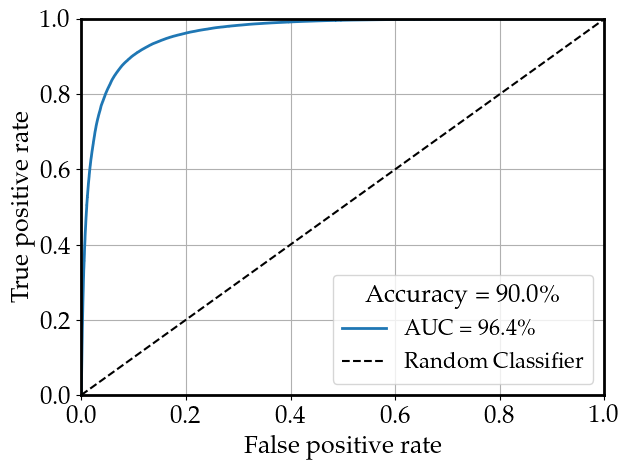

In [19]:
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f"AUC = {auc(fpr,tpr)*100:.1f}\%")
plt.plot(np.linspace(0,1),np.linspace(0,1),color='k',ls='--',label = 'Random Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.legend(loc='lower right', title=f'Accuracy = {accuracy*100:.1f}\%')
plt.tight_layout()
plt.show()

In [21]:
fig = make_ks_plot(y_train[:,0], predict_array_train[:,0],
                   y_test[:,0], predict_array_test[:,0])

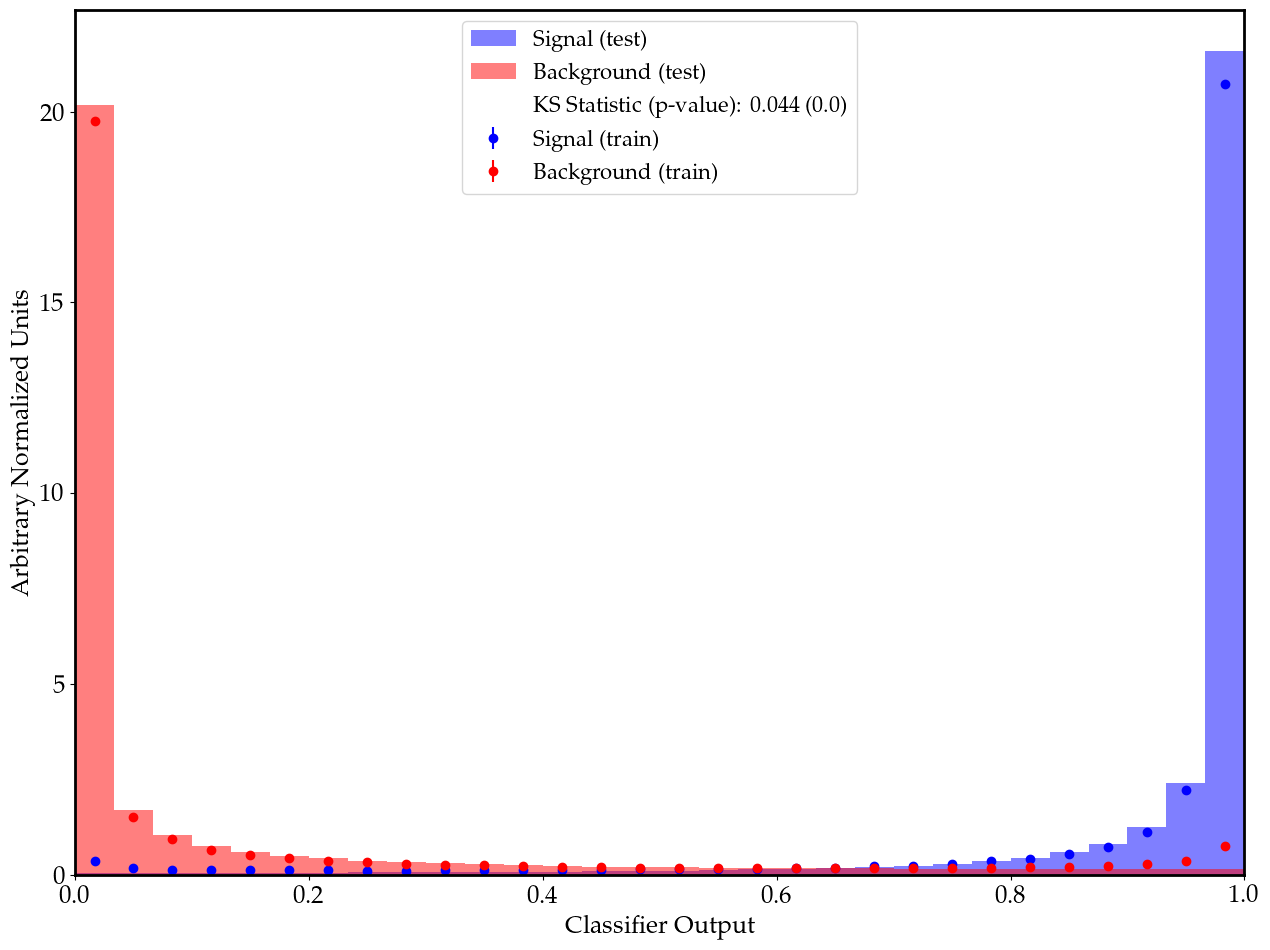

In [22]:
fig